In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
%config InlineBackend.figure_formats = ['retina']

In [2]:
df = pd.read_csv("datasets/airline.csv", index_col=0)

In [3]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3.0,4.0,3.0,...,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3.0,NaN,3.0,...,1.0,1.0,5.0,NaN,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2.0,2.0,2.0,...,NaN,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2.0,5.0,5.0,...,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,satisfied


**Question 2(a)**

In [4]:
df["satisfaction"].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                          30193      22534
Male                            28686      22491


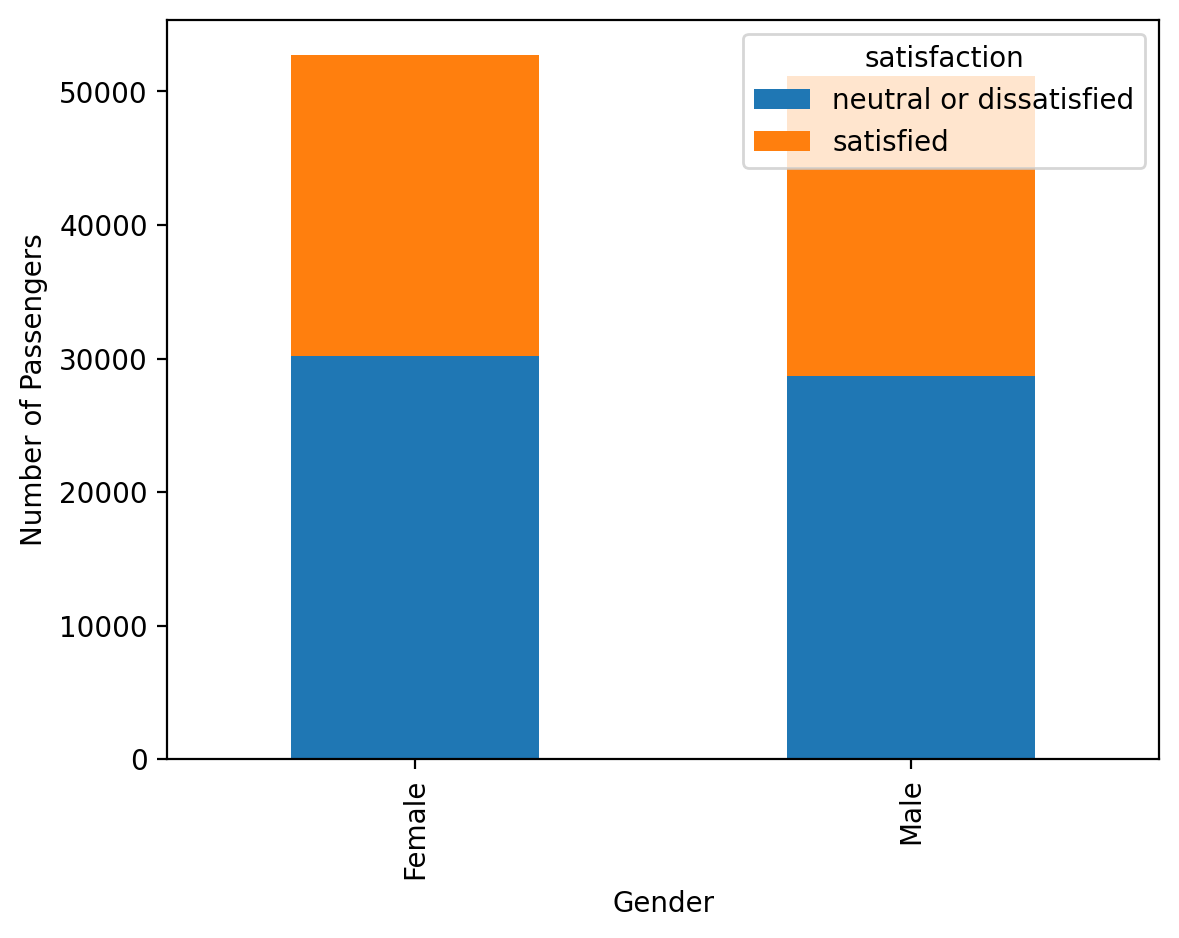

In [5]:
gender_ct = pd.crosstab(df["Gender"], df["satisfaction"])
gender_ct.plot(kind="bar", stacked=True)
plt.ylabel("Number of Passengers")

print(gender_ct)
plt.show()

satisfaction  neutral or dissatisfied  satisfied
Class                                           
Business                        15185      34480
Eco                             38044       8700
Eco Plus                         5650       1844


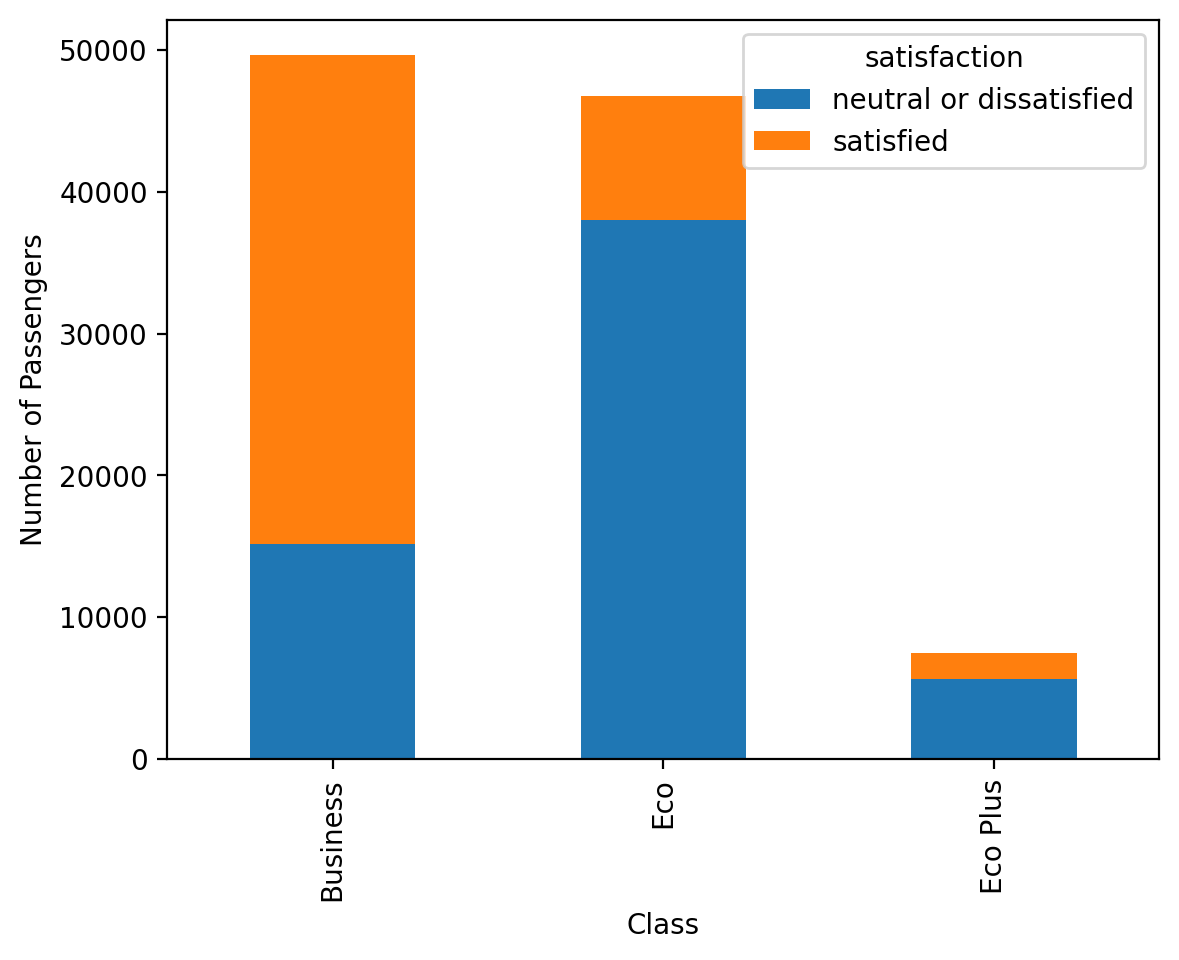

In [6]:
class_ct = pd.crosstab(df["Class"], df["satisfaction"])
class_ct.plot(kind="bar", stacked=True)
plt.ylabel("Number of Passengers")

print(class_ct)
plt.show()

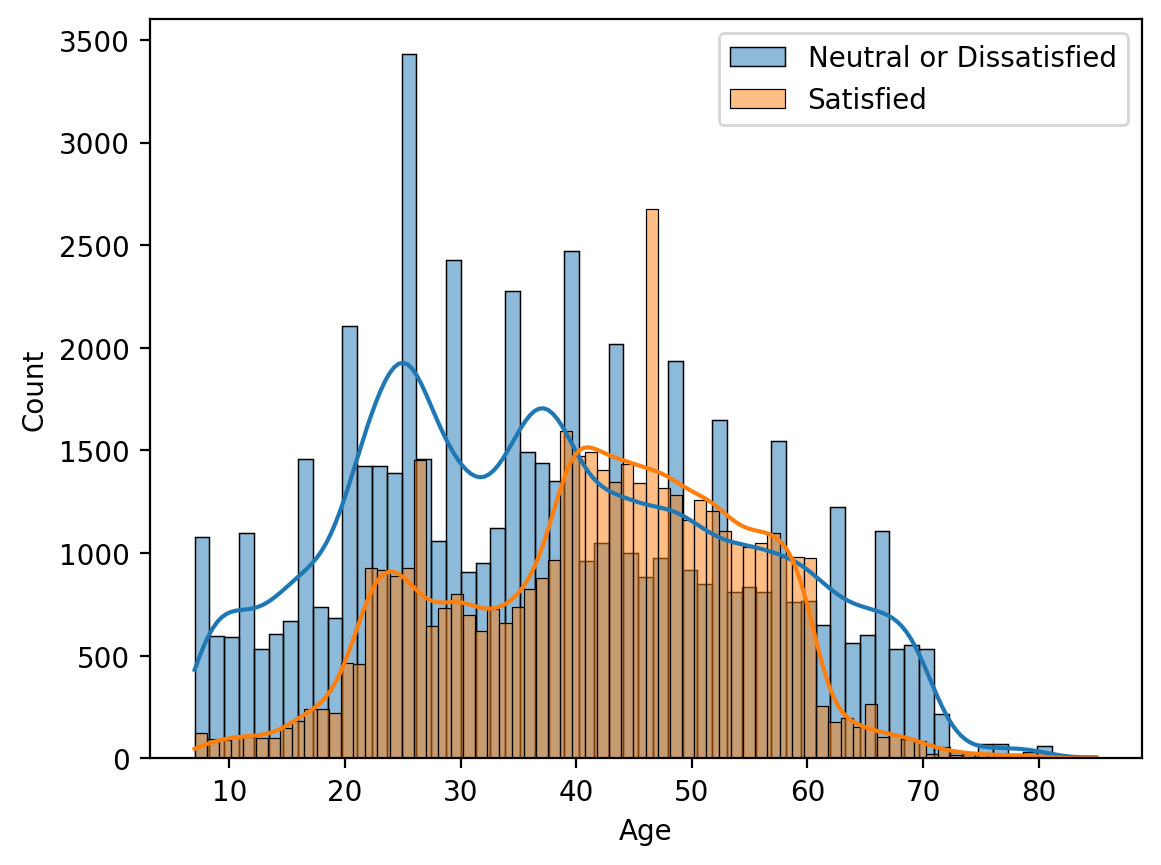

In [7]:
dissatisfied = df["satisfaction"] == "neutral or dissatisfied"
satisfied = df["satisfaction"] == "satisfied"

sns.histplot(df[dissatisfied]["Age"], kde=True, label="Neutral or Dissatisfied")
sns.histplot(df[satisfied]["Age"], kde=True, label="Satisfied")
plt.legend()
plt.show()

**Question (b)**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103901 non-null  object 
 5   Class                              103903 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103901 non-null  float64
 8   Departure/Arrival time convenient  103897 non-null  float64
 9   Ease of Online booking             103899 non-null  float64
 10  Gate location                      103893 non-null  float64
 11  Food and drink                     103891 no

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         3
Class                                  1
Flight Distance                        0
Inflight wifi service                  3
Departure/Arrival time convenient      7
Ease of Online booking                 5
Gate location                         11
Food and drink                        13
Online boarding                       14
Seat comfort                          16
Inflight entertainment                 9
On-board service                      21
Leg room service                      16
Baggage handling                      17
Checkin service                        9
Inflight service                       9
Cleanliness                            3
Departure Delay in Minutes             7
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [11]:
df_clean = df.dropna(how="any")
df_clean.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [12]:
# Exclude "id" and the target variable
X = df_clean.iloc[:, 1:-1]
y = df_clean.iloc[:, -1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=12345,
    stratify=y,
)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((82758, 22), (20690, 22), (82758,), (20690,))

In [15]:
# Ensure that the classes are stratified sampled
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array(['neutral or dissatisfied', 'satisfied'], dtype=object),
  array([46897, 35861], dtype=int64)),
 (array(['neutral or dissatisfied', 'satisfied'], dtype=object),
  array([11724,  8966], dtype=int64)))

In [16]:
cat_vars = ["Gender", "Customer Type", "Type of Travel", "Class"]

oe = OrdinalEncoder()
X_train_t = oe.fit_transform(X_train[cat_vars])
X_test_t = oe.transform(X_test[cat_vars])

X_train_num = X_train.drop(cat_vars, axis=1)
X_test_num = X_test.drop(cat_vars, axis=1)

X_train_ft = np.hstack((X_train_t, X_train_num))
X_test_ft = np.hstack((X_test_t, X_test_num))

In [17]:
X_train_ft.shape, X_test_ft.shape

((82758, 22), (20690, 22))

In [18]:
logreg = LogisticRegression(random_state=12345, max_iter=500)
logreg.fit(X_train_ft, y_train)

D:\Workspaces\ml_practical\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, random_state=12345)

In [19]:
y_pred = logreg.predict(X_test_ft)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.857467375543741
                         precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.87      0.87     11724
              satisfied       0.83      0.84      0.84      8966

               accuracy                           0.86     20690
              macro avg       0.85      0.86      0.86     20690
           weighted avg       0.86      0.86      0.86     20690



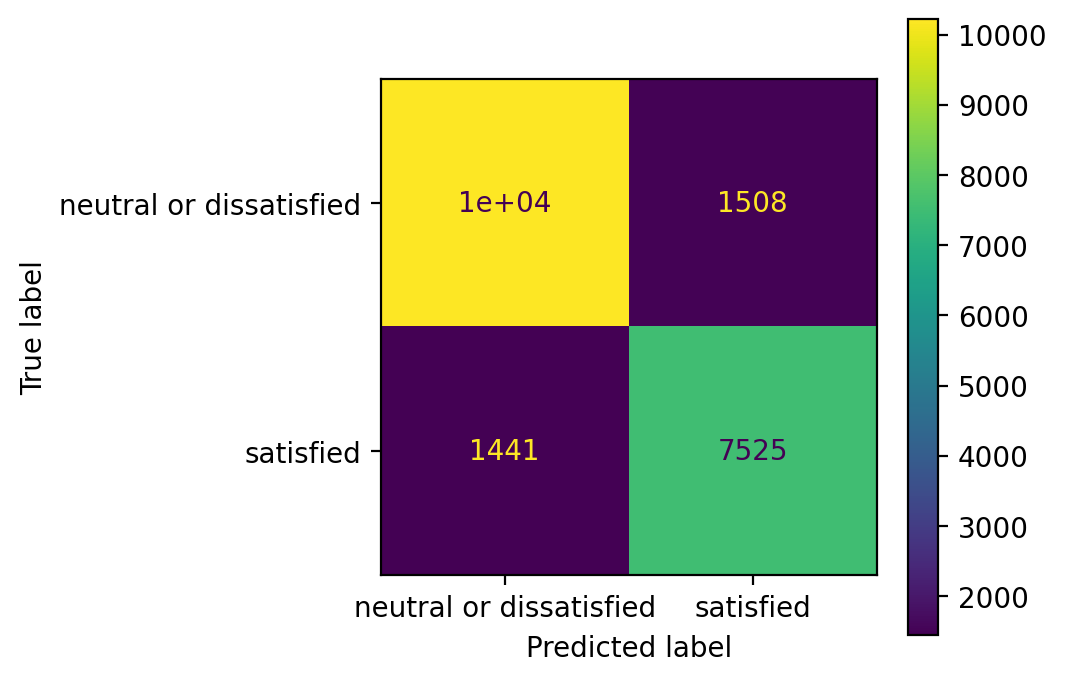

In [20]:
fig = plt.figure(figsize=(4, 4))
ax = plt.gca()

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    ax=ax,
)

plt.show()

In [21]:
rf = RandomForestClassifier()
rf = RandomForestClassifier(n_jobs=-1, random_state=12345)
rf.fit(X_train_ft, y_train)

RandomForestClassifier(n_jobs=-1, random_state=12345)

In [22]:
y_pred = rf.predict(X_test_ft)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9637506041565974
                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     11724
              satisfied       0.97      0.94      0.96      8966

               accuracy                           0.96     20690
              macro avg       0.97      0.96      0.96     20690
           weighted avg       0.96      0.96      0.96     20690



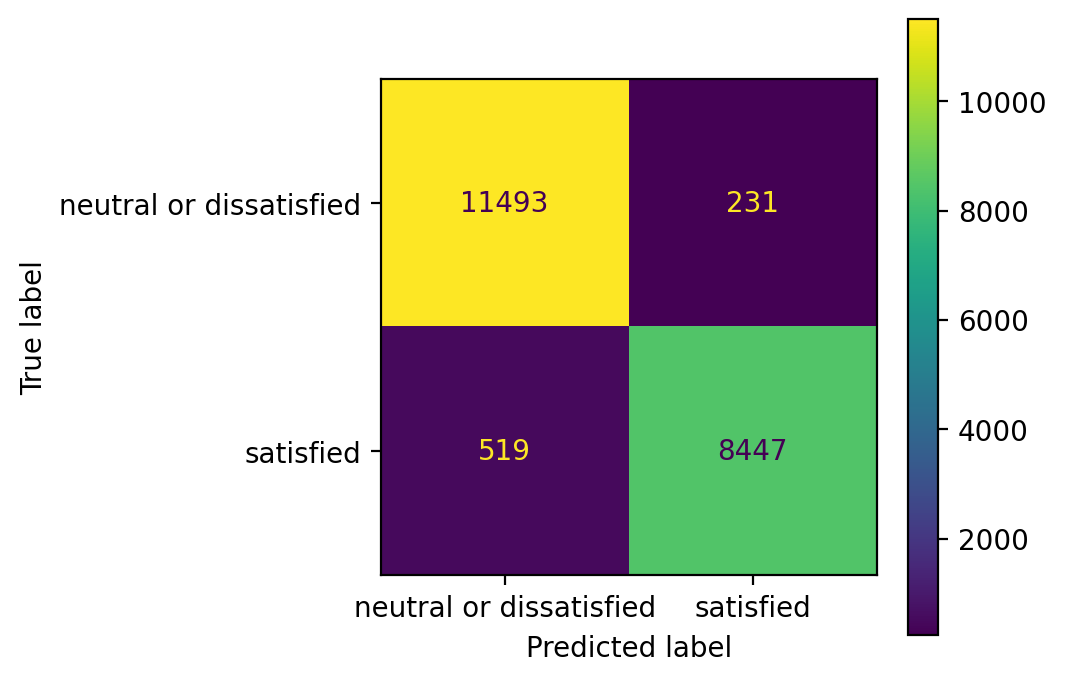

In [23]:
fig = plt.figure(figsize=(4, 4))
ax = plt.gca()

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    ax=ax,
)

plt.show()